# Introduction
Previously, following various trial and error, the data pertaining to my reading habits were collated. In this project, the data will be evaluated, looking not only for patterns in the reading habits. 
# Overview
Prior to the evaluation and visualisation of the data, there may be aspects which may need to be modified and/or cleaned. It should be noted that some aspects of the data was also pre-cleaned in Google Sheets where the original data was recorded. 
Following this cross sections of the data can be evaluated for patters and trends in the reading habits. It should be noted that this dataset contains non-English characters. This may impact certain tools and libraries. 

In [1]:
# library for data handling
import numpy as np 
import pandas as pd 

# library specific to kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

#set visualisation
%matplotlib inline
sns.set_style("whitegrid")

/kaggle/input/my-reading-log/reading log.csv


In [2]:
# read in data
df = pd.read_csv("/kaggle/input/my-reading-log/reading log.csv")

In [3]:
# examine dataset
df.head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language
0,NaN,ボッコちゃん,星 新一,315,n,2.0,Completed,Physical Book,NaN,新潮社,新潮文庫,25-May-1971,Fiction,science fiction,jp
1,12-05-20,三毛猫ホームズの推理,赤川 次郎,368,y,3.0,Completed,E-Book,Kindle,KADOKAWA,角川文庫,1-Apr-1984,Fiction,Mystery,jp
2,06-24-20,ミステリ博物館,赤川 次郎,339,n,4.0,Completed,Physical Book,NaN,KADOKAWA,角川文庫,1-Jul-1985,Fiction,Mystery,jp
3,02-28-19,Jacques the Fatalist and His Master,Denis Diderot,261,y,2.5,Completed,Physical Book,NaN,Penguin Random House,Penguin Classics,30-Jan-1986,Fiction,Humour/ Satire,jp
4,02-15-18,卒業,東野 圭吾,371,y,4.5,Completed,Physical Book,NaN,講談社,講談社文庫,8-May-1989,Fiction,Mystery,jp


In [4]:
# key information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   completion date   329 non-null    object 
 1   Title             391 non-null    object 
 2   author(s)         391 non-null    object 
 3   pages             391 non-null    int64  
 4   review            384 non-null    object 
 5   rating            345 non-null    float64
 6   status            391 non-null    object 
 7   format            391 non-null    object 
 8   platform          100 non-null    object 
 9   publisher         391 non-null    object 
 10  Imprint           391 non-null    object 
 11  publication date  391 non-null    object 
 12  type              391 non-null    object 
 13  genre             391 non-null    object 
 14  language          391 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 45.9+ KB


In [5]:
# descriptive stats of the data 
df.describe()

,pages,rating
count,391.000000,345.000000
mean,333.826087,3.576087
std,128.553393,1.057147
min,31.000000,1.000000
25%,256.000000,3.000000
50%,320.000000,4.000000
75%,384.000000,4.000000
max,912.000000,5.000000


# Evaluate variables

There are some aspects such as title which are too unique and thus very little improvements can be made for such a variable. Focusing on more categorical variables, errors should be minimised as much as possible to ensure an effective analysis of the data.  Working through the variables, the following changes were made to the data: 

* **Publication and completion date**

Reprocess the dates to ensure that it is recognised as a date and then create new variables to store the year and month separately. 

It should be noted that there are 62 books where there are no completion dates available. Unless the status reads "DNF" (did not complete), the majority of books were read before 2016. There may also be books which were read post 2016 but were incorrectly logged leading to a blank in the completion date. In total there are 53 such books. 

In [6]:
# ammend publication dates
df['publication date'] = pd.to_datetime(df['publication date'])
df['publication_year'] = df['publication date'].dt.year
df['publication_month'] = df['publication date'].dt.month

# ammend completion dates
df['completion date'] = pd.to_datetime(df['completion date'])
df['completion_year'] = df['completion date'].dt.year
df['completion_month'] = df['completion date'].dt.month

In [7]:
# number of entries with no completion date (includes DNF and unknow completion date books)
sum(df["completion date"].isnull())

62

In [8]:
# extract of completed books where date of completion unknown
df[(df["completion date"].isnull())& (df["status"]=="Completed")].head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language,publication_year,publication_month,completion_year,completion_month
0,NaT,ボッコちゃん,星 新一,315,n,2.0,Completed,Physical Book,NaN,新潮社,新潮文庫,1971-05-25,Fiction,science fiction,jp,1971,5,NaN,NaN
6,NaT,注文の多い料理店,宮沢 賢治,358,n,NaN,Completed,Physical Book,NaN,新潮社,新潮文庫,1990-05-29,Fiction,Fantasy,jp,1990,5,NaN,NaN
21,NaT,どちらかが彼女を殺した,東野 圭吾,356,y,5.0,Completed,Physical Book,NaN,講談社,講談社文庫,1999-05-14,Fiction,Mystery,jp,1999,5,NaN,NaN
25,NaT,悪意,東野 圭吾,376,y,5.0,Completed,Physical Book,NaN,講談社,講談社文庫,2001-01-17,Fiction,Mystery,jp,2001,1,NaN,NaN
26,NaT,A Study in Scarlet & The Sign of the Four,Sir Arthur Conan Doyle,224,n,4.0,Completed,Physical Book,NaN,Wordsworth Editions,Wordsworth Editions,2001-12-05,Fiction,Mystery,eng,2001,12,NaN,NaN


In [9]:
# number of books where completion date unknow 
print("There are", df[(df["completion date"].isnull())& (df["status"]=="Completed")].shape[0], "books read but no completion date was recorded.")

There are 53 books read but no completion date was recorded.


* **Review**

The variable has been logged as "y" and "n" for simplicity. However, "yes" and "no" would be more accessible, therefore it variables are revised accordingly. 


In [10]:
# update review column responses
df["review"].replace({"y": "Yes", "n":"No"}, inplace = True)
df["review"].head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: review, dtype: object

* **Platform**

Some of the values, "YouTube" and "unknown" are too niche to stand on their own, thus for simplicity are merged to Unknown.

In [11]:
# distribution of platform types
df["platform"].value_counts()

Audible      25
Libby        25
BorrowBox    24
Kindle       17
Unknown       7
Youtube       2
Name: platform, dtype: int64

* **Genre**

There are 36 genres in the dataset and an overview of the variable indicates that there are no major issues. However, there are genres listed in Japanese. Based on previous trails it was apparent that libraries such as matplotlib will struggle with the Japanese characters. Therefore, for such variables the *plotly* will be used. 

In [12]:
# number of unique genres
df["genre"].nunique()

36

In [13]:
# list of genres
df["genre"].unique()

array(['science fiction', 'Mystery', 'Humour/ Satire', 'Literary Fiction',
       'Fantasy', 'Romance', 'Science Fiction', 'Bildungsroman',
       'Self Help', 'Picture book', 'Magical realism', 'Thriller',
       'Economics', 'Horror', 'Contemporary', 'Mathematics',
       'Self-Esteem', '経済小説', 'Dystopian', 'science', '経営書', 'Psychology',
       '仕事小説', 'Fashion', 'Humour Encyclopaedias', 'Realist Literature',
       'Physical Chemistry', 'Data', 'Law', 'Business', 'Adventure',
       'Applied Physics', 'History', 'Biographies',
       'Essays, Journals & Letters', 'Architectural History'],
      dtype=object)

* **Language **

This variable uses "jp" and "eng" to represent Japanese and English. Similar to review, for clarity, they are updated to "Japanese" and "English" respectively. 

In [14]:
# view data in language column
df["language"].unique()

array(['jp', 'eng'], dtype=object)

In [15]:
# update language variables to Japanese and English for clarity
df["language"].replace({"jp": "Japanese", "eng":"English"}, inplace = True)

* **Status**

Although this is a visual aspect, "incomplete" should be "Incomplete" to match the ecstatic of the other options.  Additionally, "incomplete" and "TBR" are extremely small groups and therefore should be merged to "other". 

In [16]:
# view distrubution of status
df["status"].value_counts()

Completed     381
DNF             8
incomplete      1
TBR             1
Name: status, dtype: int64

In [17]:
# Merge Incomplete and TBR to other
df["status"].replace({"Incomplete": "Other", "TBR": "Other"}, inplace = True)

* **Type**

Type on face value appears to not have any issues.  

In [18]:
# view data in type
df["type"].value_counts()

Fiction       341
Nonfiction     50
Name: type, dtype: int64

# EDA

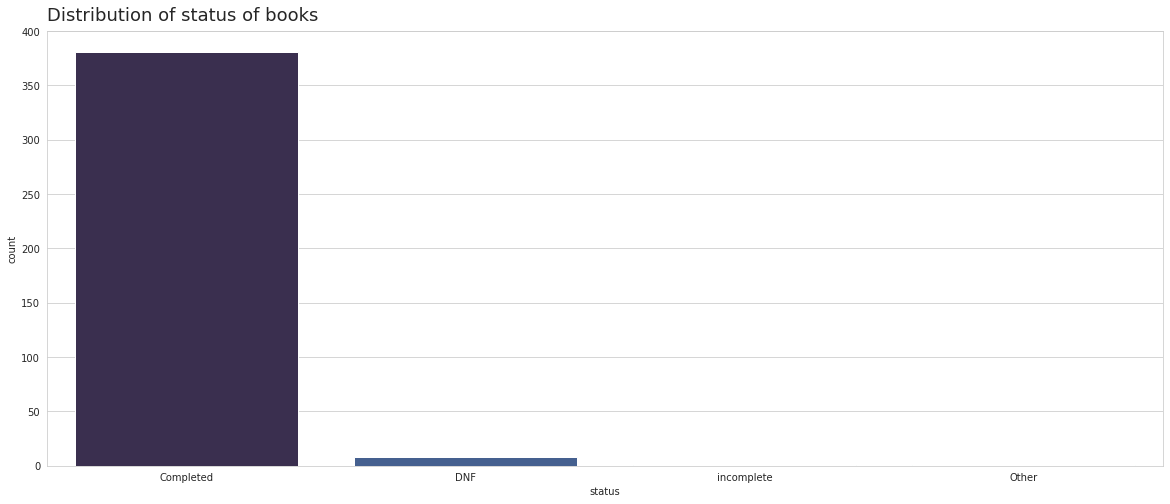

In [19]:
# visualisation of status data forthe whole dataset
plt.figure(figsize = (20,8))
sns.countplot(x = "status", data = df, palette = "mako")
plt.title("Distribution of status of books", size = 18, loc = "left", y = 1.01)
plt.show()

## DNF

For those who are not readers, DNF stands for "did not finish". Although, I typically aim to avoid giving up on a book, this list is also not a comprehensive list of books that have been side-lined. In this dataset, DNF includes 8 books, 7 audiobooks and 1 physical book, and applies to over 2,375 pages. 

In [20]:
# seperate data to DNF and completed (note there are "others")
DNF = df[df["status"]=="DNF"]
Completed = df[df["status"]=="Completed"]

In [21]:
# number of DNF pages
print(sum(DNF["pages"]), "pages were DNFed")

2375 pages were DNFed


In [22]:
# format of DNFed books
DNF["format"].value_counts()

Audiobook        7
Physical Book    1
Name: format, dtype: int64

There are no specific authors or publishers whose books appear on this list, (ie based on this dataset/category,  there are no authors/publishers whose books should be acquired with caution). This also applies to imprints. 

In [23]:
# confirm whether there are duplicated authors in the DNF data
if DNF["author(s)"].nunique() ==DNF.shape[0]:
    print("There are",DNF["author(s)"].nunique(), "authors and no duplicated authors.")
else:
    print("There are",DNF["author(s)"].nunique(),"authors and include duplicates. You may wish to avoid some authors.")

There are 8 authors and no duplicated authors.


In [24]:
# confirm whether there are duplicated publishers in the DNF data

if DNF["author(s)"].nunique() ==DNF.shape[0]:
    print("There are",DNF["publisher"].nunique(), "publishers and no duplicates.")
else:
    print("There are",DNF["publisher"].nunique(),"publishers and include duplicates. You may wish to avoid some publishers.")

There are 8 publishers and no duplicates.


In [25]:
# confirm whether there are duplicated imprints in the DNF data

if DNF["Imprint"].nunique() ==DNF.shape[0]:
    print("There are",DNF["Imprint"].nunique(), "imprints and no duplicates.")
else:
    print("There are",DNF["Imprint"].nunique(),"imprints and include duplicates. You may wish to avoid some imprints.")

There are 8 imprints and no duplicates.


Books secured via the library audiobook service, BorrowBox, is more prone to DNFs. However, this is extremely narrow margin, beating Libby and Audible by only one book. Library books have a relatively low cost margin for DNFing a book compared to a physical books and some books purchased on Audible can also be returned if it has not met the customer's expectation. 

In [26]:
# review how the DNF audiobooks were consumed
DNF[DNF["format"]=="Audiobook"]["platform"].value_counts()

BorrowBox    3
Audible      2
Libby        2
Name: platform, dtype: int64

Books more likely to be DNFed appear to have been published relatively recently, 2005-2022. 3 books published between 2015 and 2019 and was therefore, the range with the highest DNFs. As for month of publication, books published in latter half of the year are particularly porn to DNF.

In [27]:
# distribution of publication data (year) for DNFed book
fig = px.histogram(DNF, x = "publication_year", nbins=5, title = "Distribution of publication date (year)")

fig.update_layout({ "plot_bgcolor" : "rgba(0,0,0,0)",
                  "paper_bgcolor": "rgba(0,0,0,0)"})

fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")
fig.add_annotation(text = ("Publication data for books which were DNF. <br>Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x = 0, y = -.15,
                          xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom", xshift = -1, yshift = -5, font = dict(size =10, color = "grey"), align = "left")
fig.show()

In [28]:
# distribution of publication data (month) for DNFed book
fig = px.histogram(DNF, x = "publication_month", nbins=4, title = "Distribution of publication date (month)")
fig.update_layout(xaxis_range = [1,12])
fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})

fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text= ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"),
                  showarrow = False, x = 0, y = -.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom", 
                  xshift =-1, yshift = -5, font = dict(size = 10, color = "grey"), align = "left")

Genres self-helps and to a latter extent literary fiction, are the most susceptible to DNF. 

In [29]:
# distribution of genre for DNFed books
fig = px.histogram(DNF, x = "genre", title = "Distribution of genres in the DNF books")

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), 
                   showarrow= False, x = 0, y = -.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom", 
                  xshift =-1, yshift = -5, font = dict(size = 10, color = "grey"), align = "left")
fig.show()

# Read but completion date unknown

The majority of the 53 books were read in Japanese with the most popular authors including  藤崎 都, 東野 圭吾 and 日丸屋 秀和. Whilst 藤崎 都 and 東野 圭吾 were authors of books, 日丸屋 秀和 is a [mangaka](https://en.wikipedia.org/wiki/Manga_artist#:~:text=A%20manga%20artist%20(or%20mangaka,artists%20were%20working%20in%20Japan). 

In [30]:
# extract books read but with no completion date
completion_date_unknown = Completed[Completed["completion date"].isnull()]

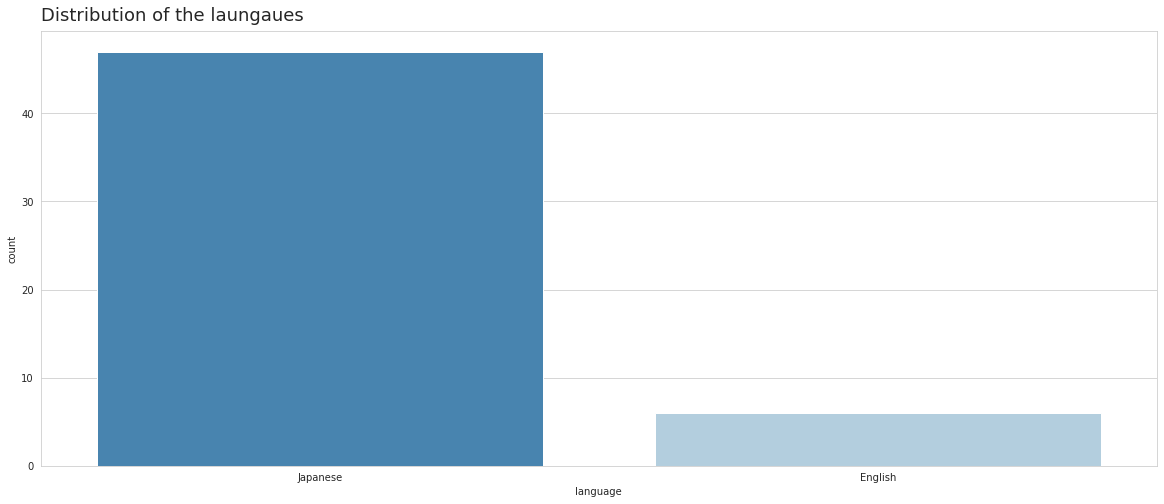

In [31]:
# view distribution of lauagues in the dataset
plt.figure(figsize = (20,8))
sns.countplot(x = "language", data = completion_date_unknown, palette = "Blues_r")
plt.title("Distribution of the laungaues",size = 18, loc = "left", y = 1.01)
plt.show()

In [32]:
# Top 10 authors for books read but have no recorded completion date
completion_date_unknown["author(s)"].value_counts().head(10)

藤崎 都                      6
東野 圭吾                     6
日丸屋 秀和                    6
三上 延                      4
谷 瑞恵                      3
伊坂 幸太郎                    3
葉山 透                      2
Sir Arthur Conan Doyle    2
朝霧 カフカ                    2
川村 元気                     1
Name: author(s), dtype: int64

In [33]:
# visualisation of authors for books read but have no recorded completion date
fig = px.histogram( completion_date_unknown, x = "author(s)", title = "Popular authors")

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), 
                  showarrow =False, x = 0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom", 
                  xshift = -1, yshift =-65, font= dict(size =10, color = "grey"), align = "left")

In [34]:
# How were the books by the most popular authors consumed
Book_format = completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")]["format"].unique()
if len(Book_format) ==1: 
    print("The books by the most popular authors were consumed as a", "{}{}".format(Book_format[0].lower(),"."))
else: 
    print("The books by the most popular authors were consumed as a",Book_format)

The books by the most popular authors were consumed as a physical book.


During this time, a high proportion, 79.3% , of the books consumed were via physical books. Only one book was consumed via audiobook.

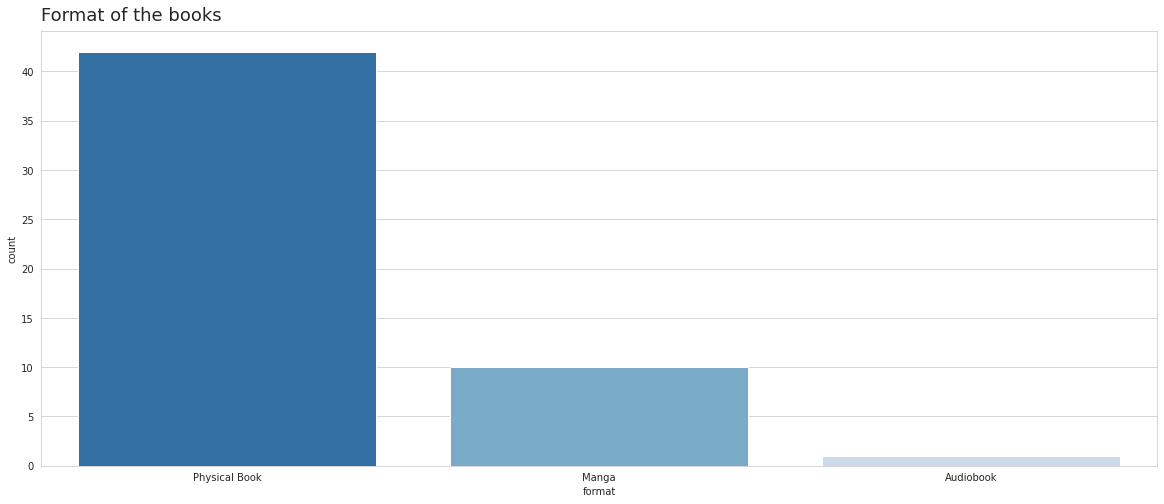

In [35]:
# distribution of formats thoughout the books read with no completion date
plt.figure(figsize = (20,8))
sns.countplot(x = "format", data = completion_date_unknown, palette = "Blues_r")
plt.title("Format of the books", size = 18, loc = "left", y = 1.01)
plt.show()

In [36]:
percent = round(((completion_date_unknown[completion_date_unknown["format"]== "Physical Book"].shape[0]/completion_date_unknown.shape[0])*100), 2)
print("{}{}".format(percent,"% of books with no completion date were consumed as a physical book."))

79.25% of books with no completion date were consumed as a physical book.


In [37]:
# information of the book with no completion date consumed as an audiobook
completion_date_unknown[completion_date_unknown["format"]== "Audiobook"]

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language,publication_year,publication_month,completion_year,completion_month
349,NaT,どうしても生きてる,朝井 リョウ,323,Yes,4.0,Completed,Audiobook,Audible,幻冬舎,幻冬舎文庫,2019-10-10,Fiction,Contemporary,Japanese,2019,10,NaN,NaN


In [38]:
# Imprints of books with no completion date
fig = px.histogram( completion_date_unknown, x = "Imprint", title = "Distribution of imprints")

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-75, font = dict(size = 10, color = "grey"), align = "left")

In [39]:
#imprints of favoured authors
imprints = completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")|(completion_date_unknown["author(s)"] =="日丸屋 秀和")]["Imprint"].unique()

print("For the popular authors in the list of read books with no completion date, their books were published via the following imprints:",*imprints, sep= ", ")

For the popular authors in the list of read books with no completion date, their books were published via the following imprints:, 講談社文庫, 幻冬舎コミックス, 角川ルビー文庫, 文春文庫, 集英社文庫


In [40]:
# distribution of publishers for books with no completion date
fig = px.histogram( completion_date_unknown, x = "publisher")

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-5, font = dict(size = 10, color = "grey"), align = "left")

In [41]:
#publisher of favoured authors
publisher = completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")|(completion_date_unknown["author(s)"] =="日丸屋 秀和")]["publisher"].unique()

print("For the popular authors in the list of read books with no completion date, their books were published by:",*publisher, sep= ", ")

For the popular authors in the list of read books with no completion date, their books were published by:, 講談社, 幻冬舎, KADOKAWA, 文藝春秋, 集英社


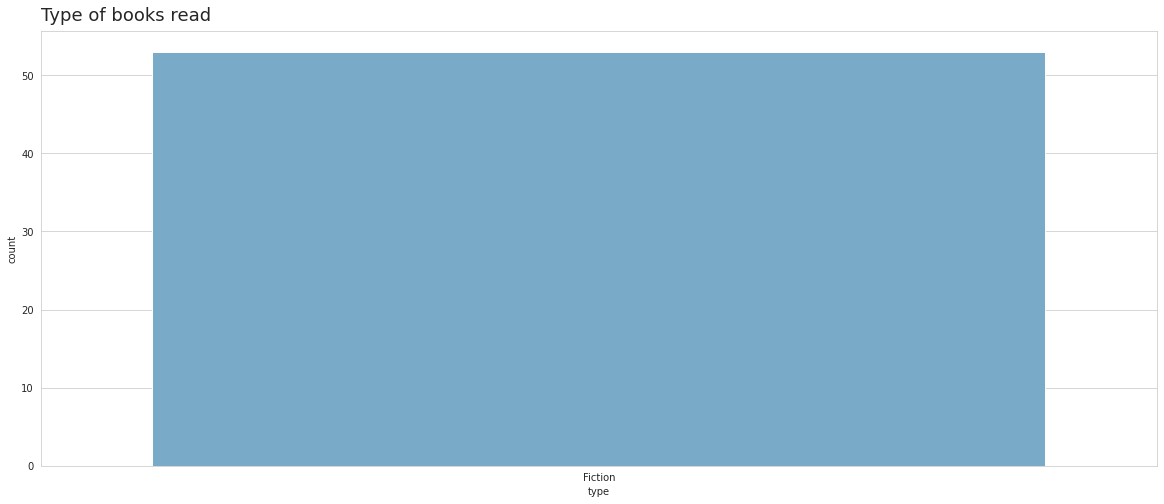

In [42]:
# type of books which were included in the books with no completion date
plt.figure(figsize = (20,8))
sns.countplot(x = "type", data = completion_date_unknown, palette = "Blues_r" )
plt.title("Type of books read",size = 18, loc = "left", y = 1.01)
plt.show()

In [43]:
# genre of books with no completion date
px.histogram( completion_date_unknown, x = "genre")

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-5, font = dict(size = 10, color = "grey"), align = "left")

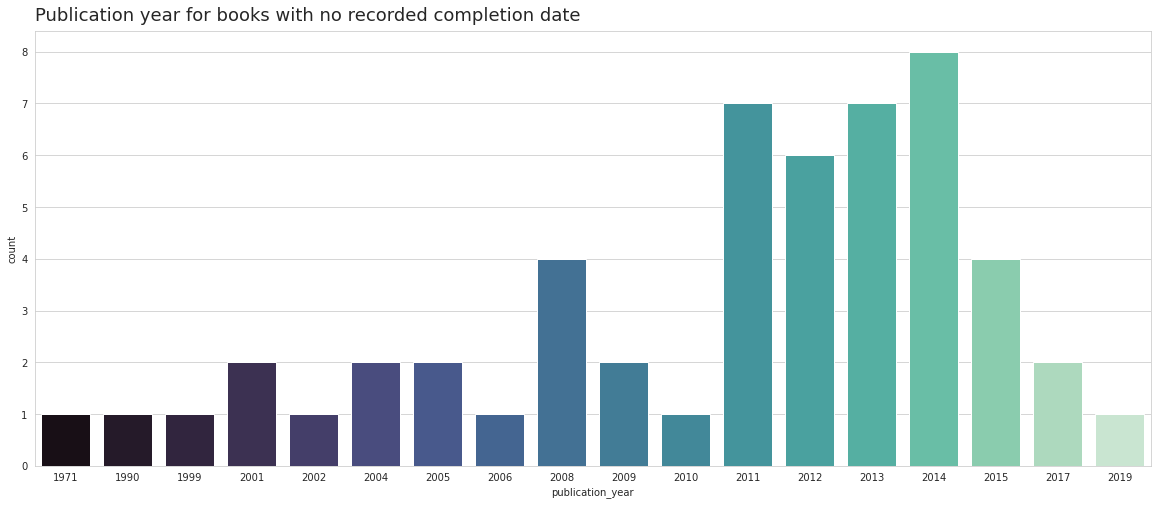

In [44]:
# year of publication of books with no completion date
plt.figure(figsize = (20,8))
sns.countplot(x = "publication_year", data = completion_date_unknown, palette = "mako")
plt.title("Publication year for books with no recorded completion date", size = 18, loc = "left", y = 1.01)
plt.show()

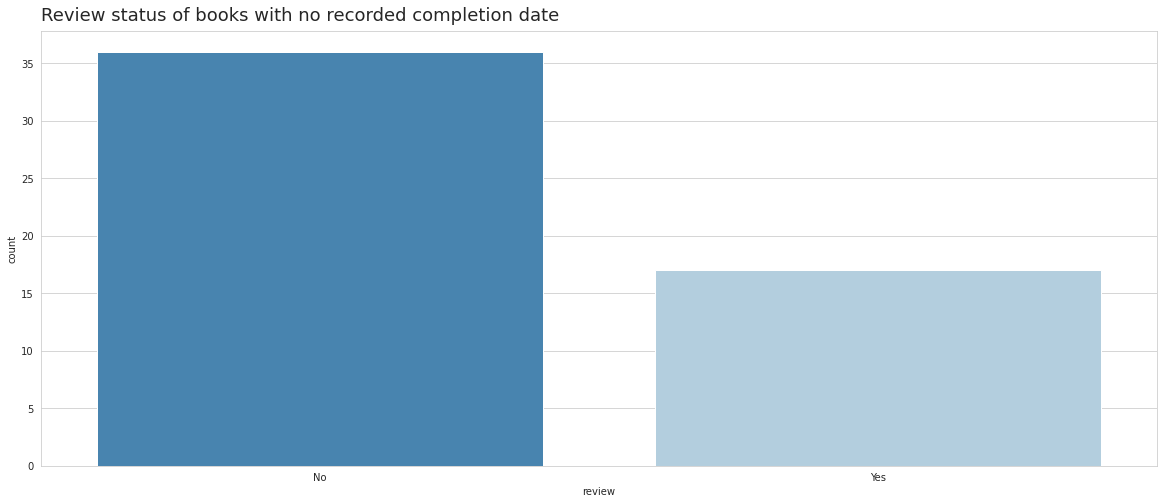

In [45]:
# review status of books with no completion date
plt.figure(figsize = (20,8))
sns.countplot(x = "review", data = completion_date_unknown,palette = "Blues_r")
plt.title("Review status of books with no recorded completion date",size = 18, loc = "left", y = 1.01)
plt.show()

In [46]:
# calcualate the % of reviews in the data

reviews = round(((1-completion_date_unknown["rating"].isnull().sum())/completion_date_unknown.shape[0])*100,2)

# output as sentence
print("{}{}".format(reviews,"% of books with no completion date have a rating."))

-33.96% of books with no completion date have a rating.


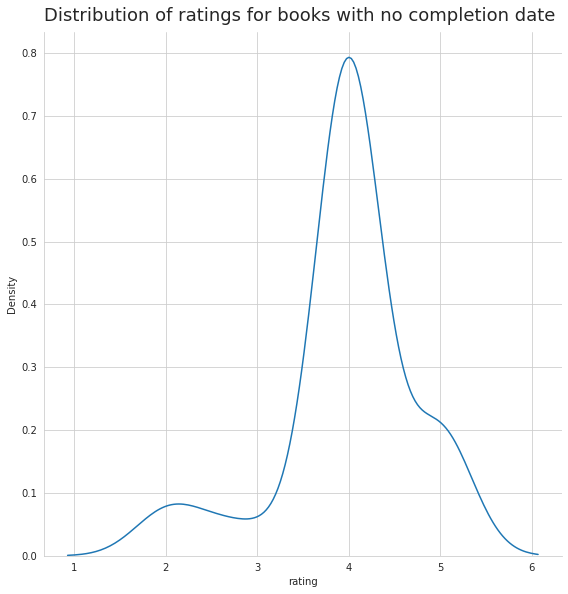

In [47]:
# kde distribution of ratings for books with no completion date
sns.displot(x = "rating", data = completion_date_unknown, kind= "kde", height = 8)
plt.title("Distribution of ratings for books with no completion date", fontsize = 18, loc = "left", y = 1.01)
plt.show()

In [48]:
print(completion_date_unknown["rating"].max(), "is the highest rating book for which no completion date was included.")

5.0 is the highest rating book for which no completion date was included.


# completion books

In [49]:
# exclude completed books with no completion date
Completed = Completed.dropna(subset = ["completion date"])

In [50]:
# distribution of completion dates and the pages read
fig = px.bar( Completed, x= "completion date", y = "pages")
fig.update_layout(yaxis_range = [0,1150])

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-5, font = dict(size = 10, color = "grey"), align = "left")

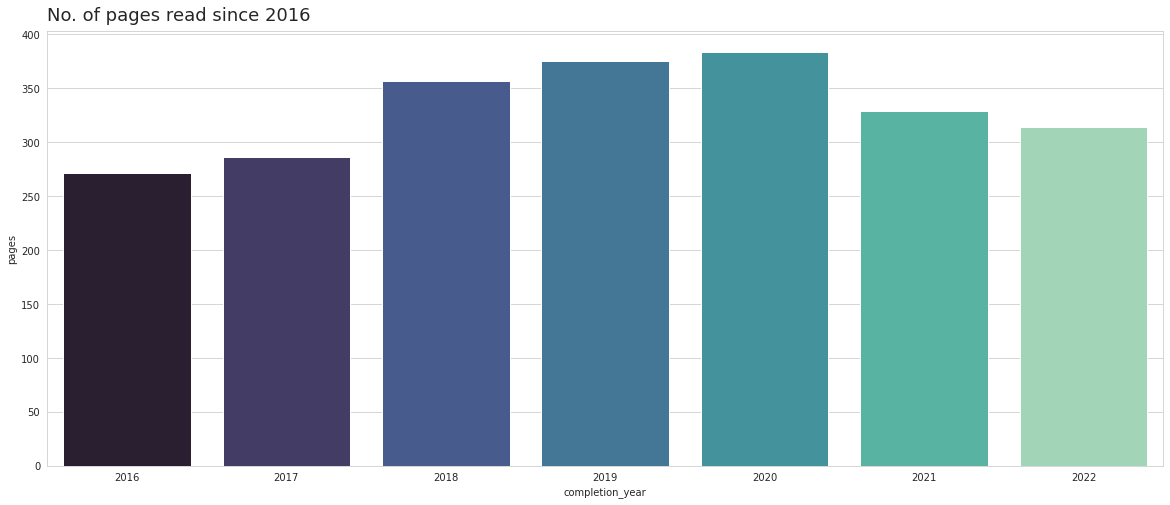

In [51]:
# Number of pages read since 2016 to 2022
plt.figure(figsize = (20,8))
sns.barplot( x= Completed["completion_year"].astype("int"), y = "pages", data = Completed, ci = None, palette = "mako")
plt.title("No. of pages read since 2016", size = 18, loc = "left", y = 1.01)
plt.show()

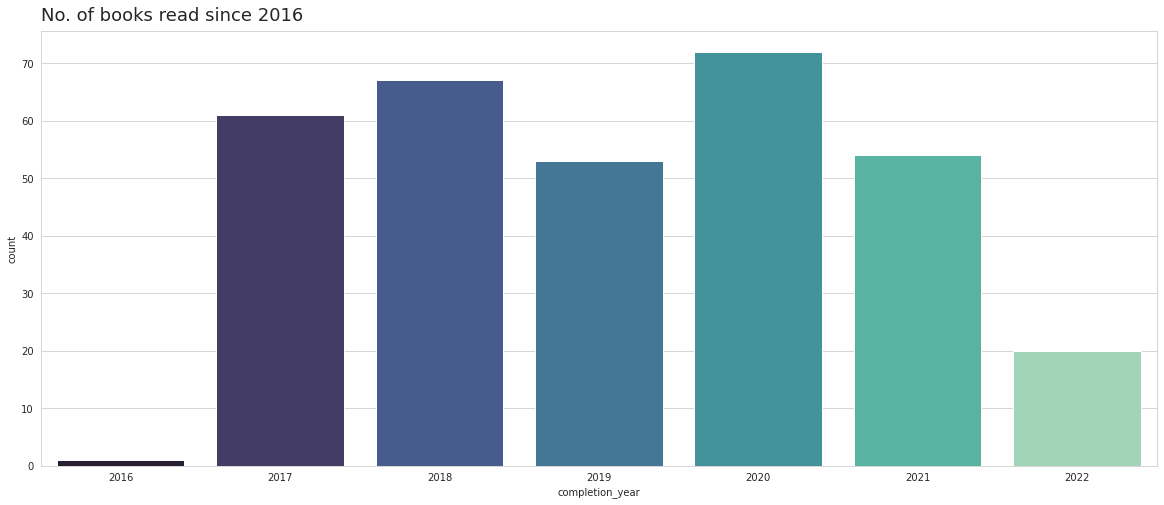

In [52]:
# Number of books read since 2017
plt.figure(figsize = (20,8))
sns.countplot( x= Completed["completion_year"].astype("int"),data = Completed, palette = "mako")
plt.title("No. of books read since 2016",size = 18, loc = "left", y = 1.01)
plt.show()

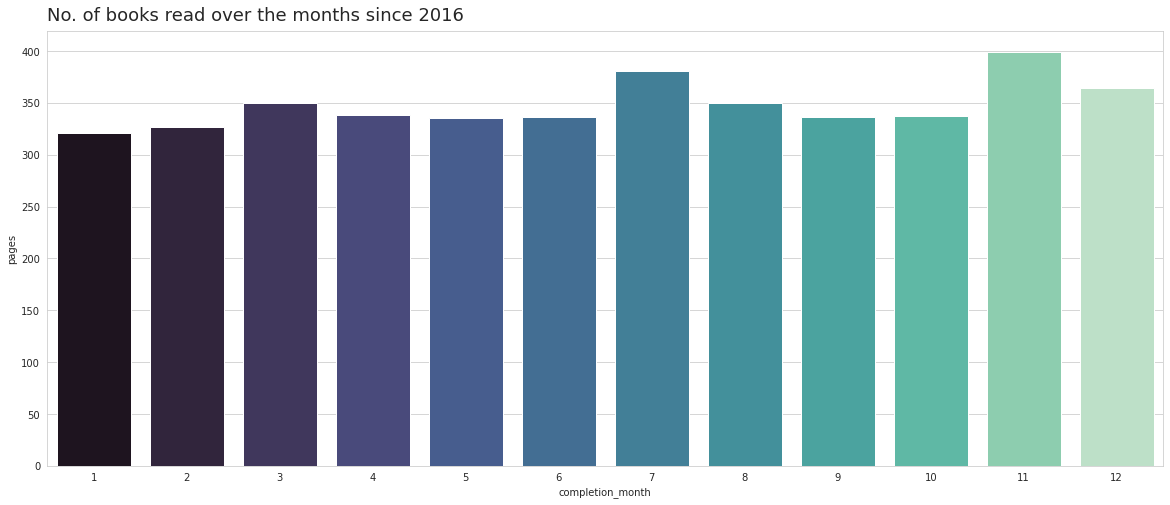

In [53]:
# Number of books read in various months
plt.figure(figsize = (20,8))
sns.barplot( x= Completed["completion_month"].astype("int"), y = "pages", data = Completed,ci = None, palette = "mako")
plt.title("No. of books read over the months since 2016",size = 18, loc = "left", y = 1.01)
plt.show()

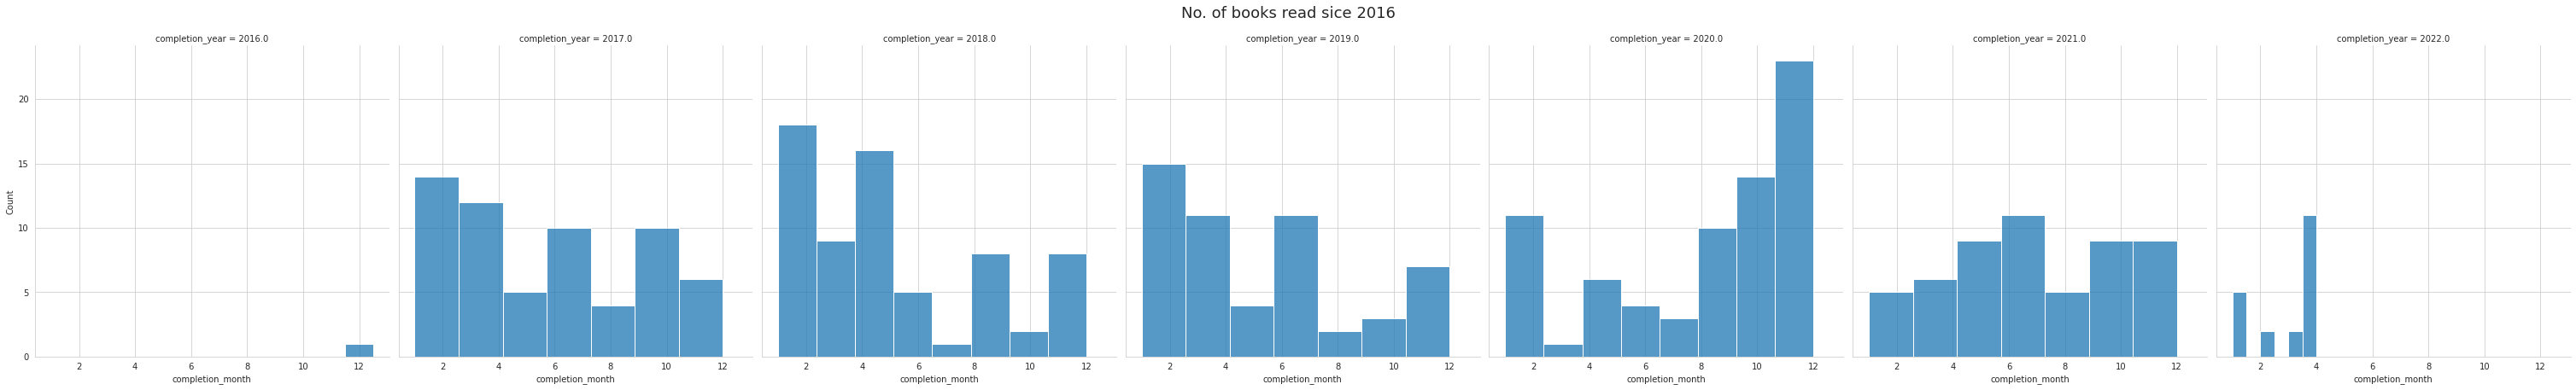

In [54]:
g = sns.FacetGrid(Completed, col='completion_year', height=6,)
g.map(sns.histplot, "completion_month",)

plt.suptitle("No. of books read sice 2016",size = 18, y = 1.05)
plt.show()

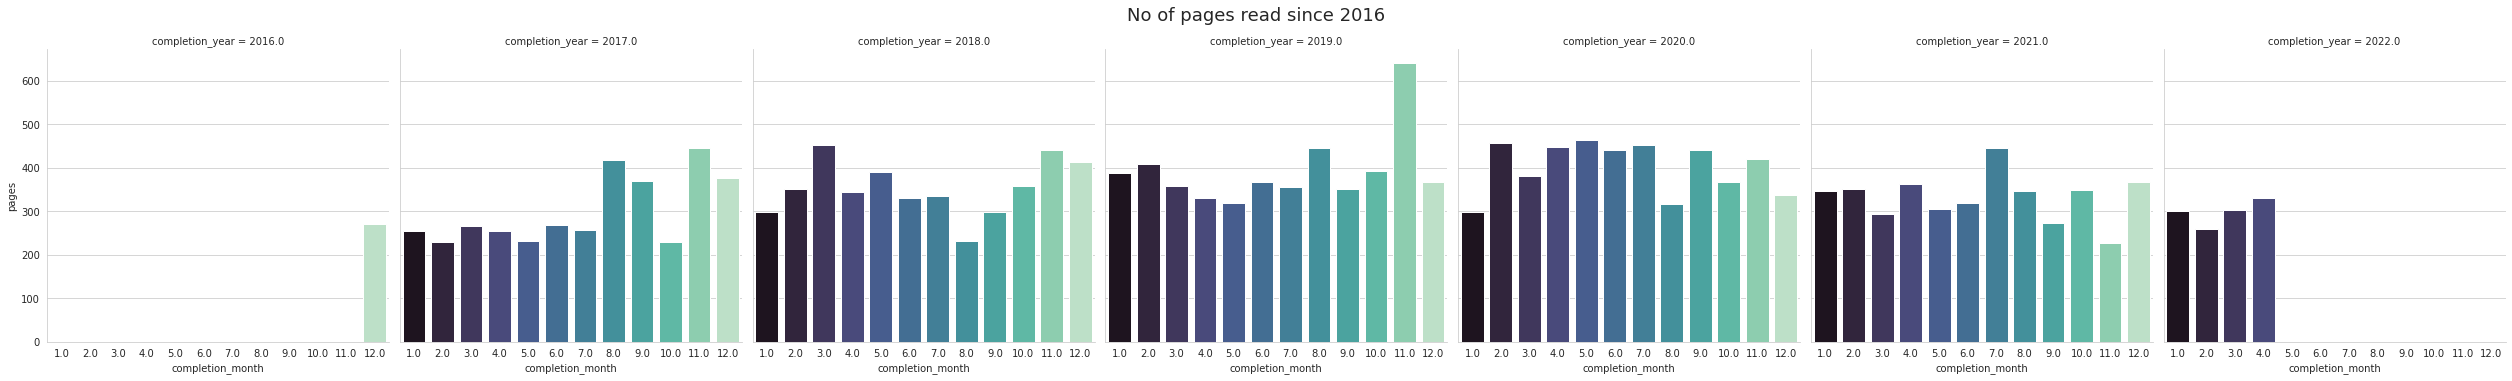

In [55]:
# fluctuations in the number of pages read over time

sns.catplot(data = Completed, x="completion_month", y = "pages", col = "completion_year", kind = "bar",ci = None, palette = "mako")

plt.suptitle("No of pages read since 2016",size = 18, y = 1.05)
plt.show()

In [56]:
print("There are", Completed["Title"].nunique(), "unique titles.")

There are 317 unique titles.


In [57]:
# list of rereads
rereads = df["Title"].value_counts().rename_axis ("titles").reset_index(name = "reads")
rereads[rereads["reads"]>1].head()

,titles,reads
0,ぼくは明日、昨日のきみとデートする,2
1,Economics: The User's Guide,2
2,Economics,2
3,Magpie Murders,2
4,妖怪アパートの幽雅な日常 1,2


In [58]:
print(rereads[rereads["reads"]>1].shape[0], "of books were reread.")
print("This accounts to", round((1 -Completed["Title"].nunique()/Completed.shape[0])*100,2), "% of books with a recorded completion date.")

13 of books were reread.
This accounts to 3.35 % of books with a recorded completion date.


In [59]:
# exclude reread entries
first_reads = Completed.drop_duplicates(subset = ["Title"], keep = "first"  )

# find the most popular author in the remaining list of books. 
fav_authors = first_reads["author(s)"].value_counts().rename_axis ("author(s)").reset_index(name = "books/reads")

# Number of authors, for whome more than one book was read. 
fav_authors[fav_authors["books/reads"]>1].shape[0]

44

In [60]:
# top 10 authors with most number of books read
fav_authors[fav_authors["books/reads"]>1].head()

,author(s),books/reads
0,東野 圭吾,15
1,谷 瑞恵,13
2,香月 日輪,8
3,伊坂 幸太郎,7
4,ふじた,6


In [61]:
# popular authors for whome more than 2 books were read. 
fig = px.bar(fav_authors[fav_authors["books/reads"]>2], x="author(s)", y = "books/reads" )

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-25, font = dict(size = 10, color = "grey"), align = "left")

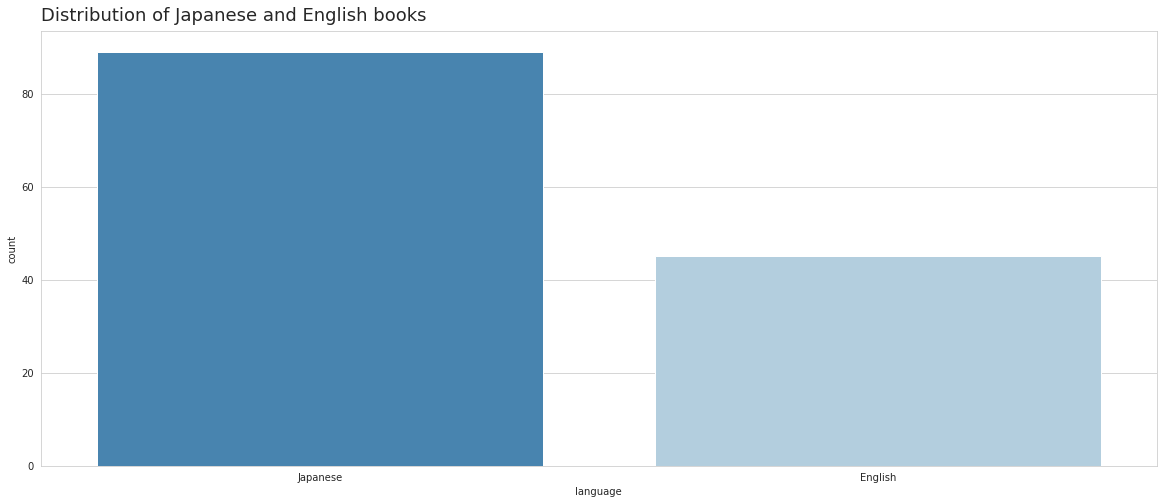

In [62]:
# laguage distribution of the books where more than two books by the author was read. 
fav_authors = fav_authors[fav_authors["books/reads"]>2]

plt.figure(figsize = (20,8))
sns.countplot(x = "language", data = Completed[Completed["author(s)"].isin(fav_authors["author(s)"])], palette = "Blues_r")
plt.title("Distribution of Japanese and English books", size = 18, loc = "left", y = 1.01)
plt.show()

In [63]:
ratio = (sum(Completed[Completed["author(s)"].isin(fav_authors["author(s)"])]["language"]=="Japanese")/Completed[Completed["author(s)"].isin(fav_authors["author(s)"])].shape[0])*100
print("There were", round(ratio,2),"% more Japanese rereads than English rereads")

There were 66.42 % more Japanese rereads than English rereads


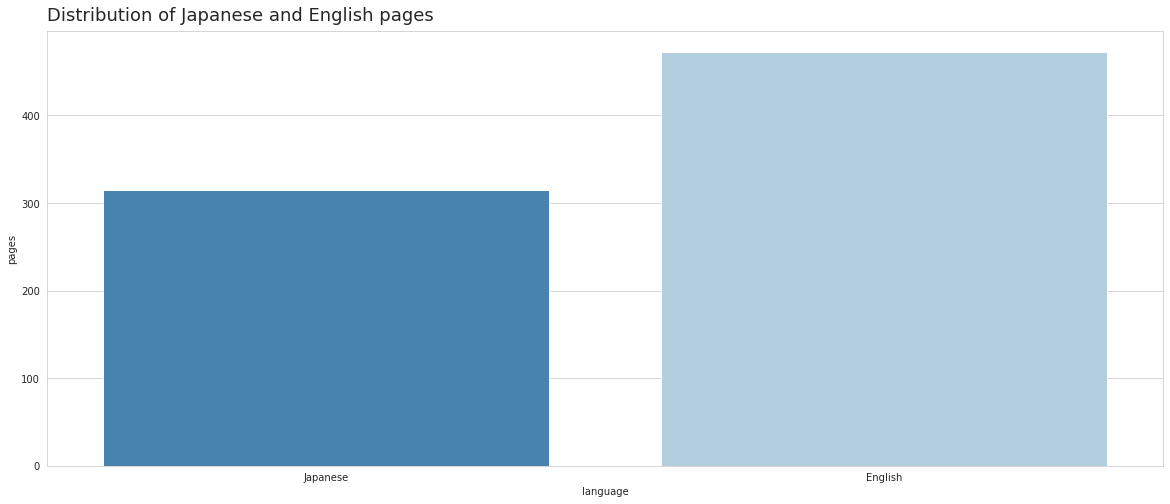

In [64]:
# where more than two books for an author was read, the visualisation of the number of pages per language read. 
fav_authors = fav_authors[fav_authors["books/reads"]>2]

plt.figure(figsize = (20,8))
sns.barplot(x = "language", y = "pages", data = Completed[Completed["author(s)"].isin(fav_authors["author(s)"])], ci = None, palette = "Blues_r")
plt.title("Distribution of Japanese and English pages",size = 18, loc = "left", y = 1.01)
plt.show()

In [65]:
# the spread of the number of pages and its descriptive statistic
Completed["pages"].describe()

count    328.000000
mean     345.042683
std      132.200471
min       31.000000
25%      259.750000
50%      327.000000
75%      400.000000
max      912.000000
Name: pages, dtype: float64

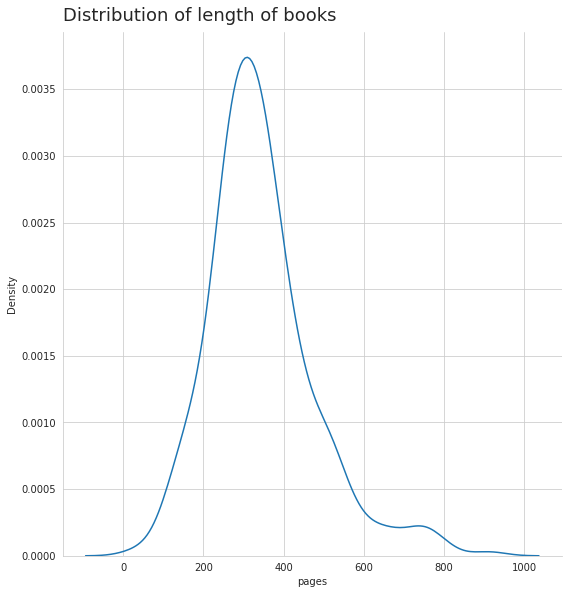

In [66]:
# destribution of the pages for books with a completion date

sns.displot(x = "pages", data = Completed, kind= "kde", height = 8)
plt.title("Distribution of length of books" ,size = 18, loc = "left", y = 1.01)
plt.show()

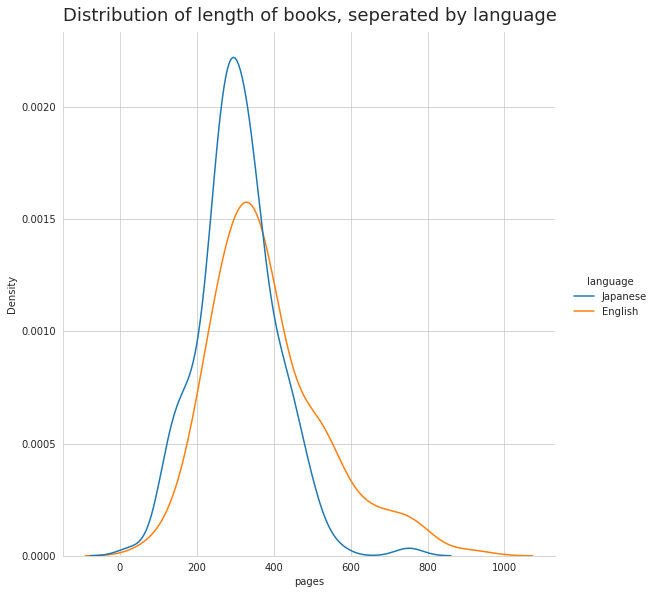

In [67]:
# destribution of the pages for books with a completion date seperated by laguage

sns.displot(x = "pages", data = Completed, kind= "kde", hue = "language", height = 8)
plt.title("Distribution of length of books, seperated by language" ,size = 18, loc = "left", y = 1.01)
plt.show()


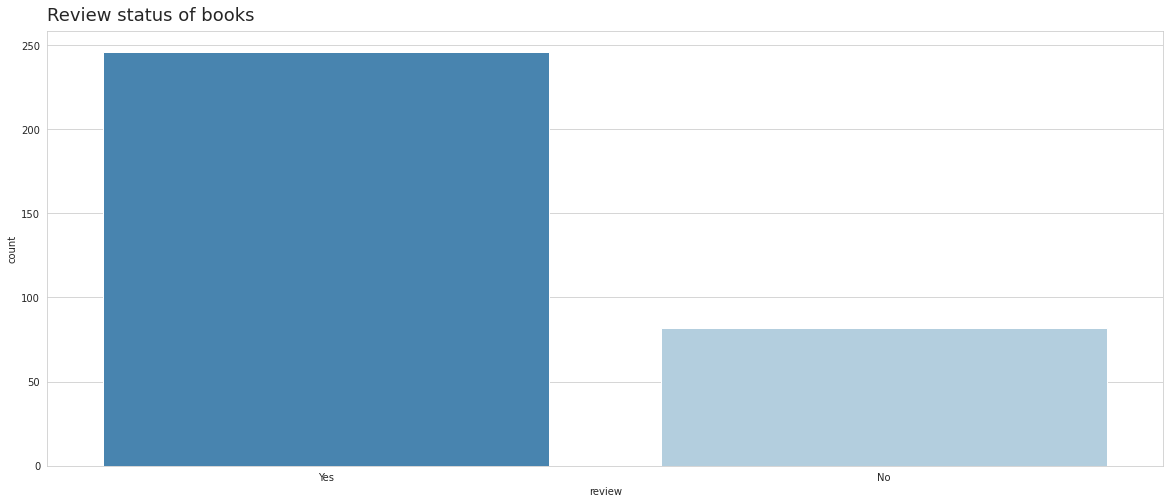

In [68]:
# ratio of reviews to no reviews for books with a known completion date
plt.figure(figsize = (20,8))
sns.countplot(x = "review", data = Completed, palette = "Blues_r")
plt.title("Review status of books", size = 18, loc = "left", y = 1.01)
plt.show()

In [69]:
print(round((Completed[Completed["review"]=="Yes"].shape[0]/Completed.dropna(subset = ["review"]).shape[0])*100, 1) ,"% of books read have been reviewed")

75.0 % of books read have been reviewed


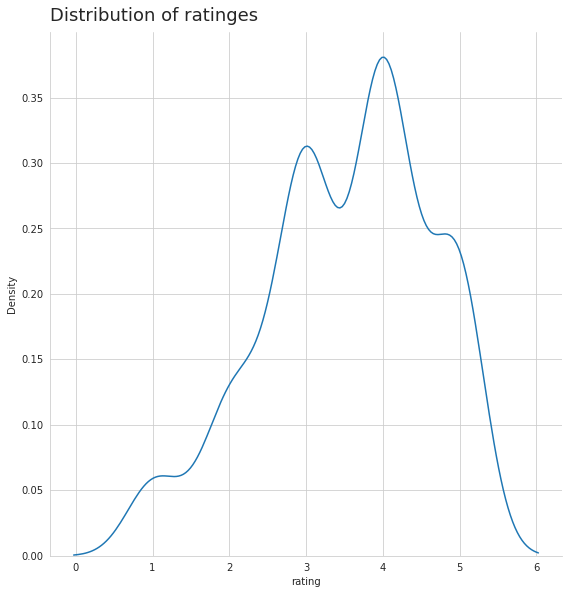

In [70]:
# distribution of the ratings for books with a known completion date

sns.displot(x = "rating", data = Completed, kind= "kde", height = 8)
plt.title("Distribution of ratinges",size = 18, loc = "left", y = 1.01)
plt.show()

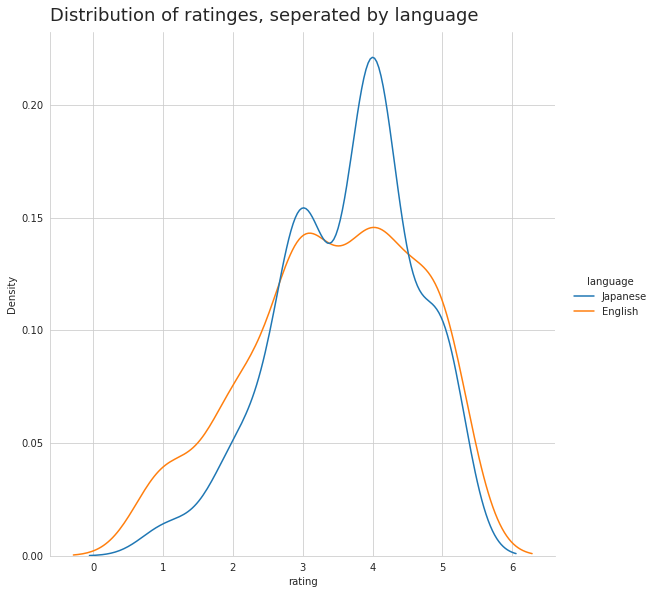

In [71]:
# distribution of the ratings for books with a known completion date with respect to language

sns.displot(x = "rating", data = Completed, kind= "kde", hue = "language", height = 8)
plt.title("Distribution of ratinges, seperated by language",size = 18, loc = "left", y = 1.01)
plt.show()

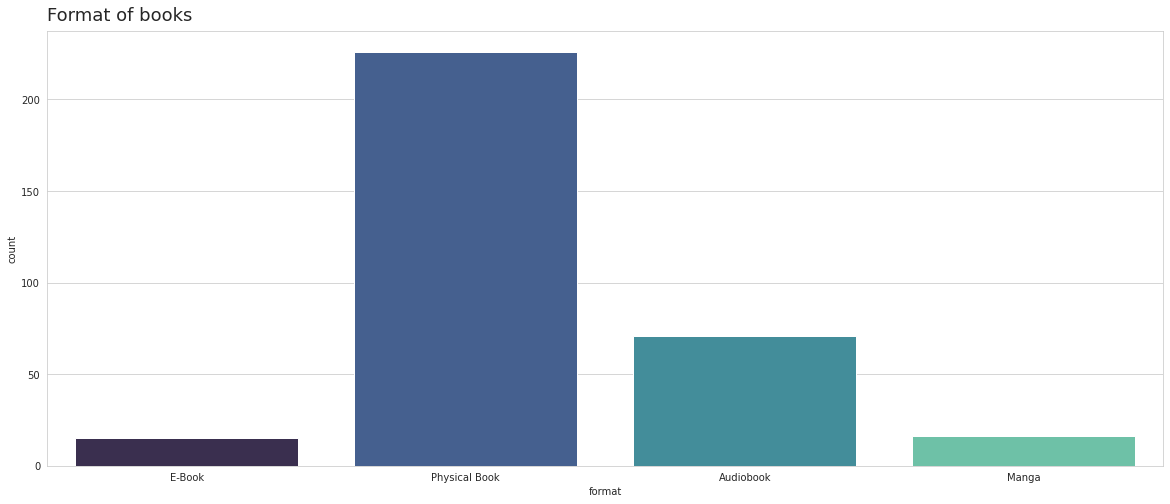

In [72]:
# distribution of the formats for books with a known completion date
plt.figure(figsize = (20,8))
sns.countplot(x = "format", data = Completed, palette = "mako")
plt.title("Format of books", size = 18, loc = "left", y = 1.01)
plt.show()

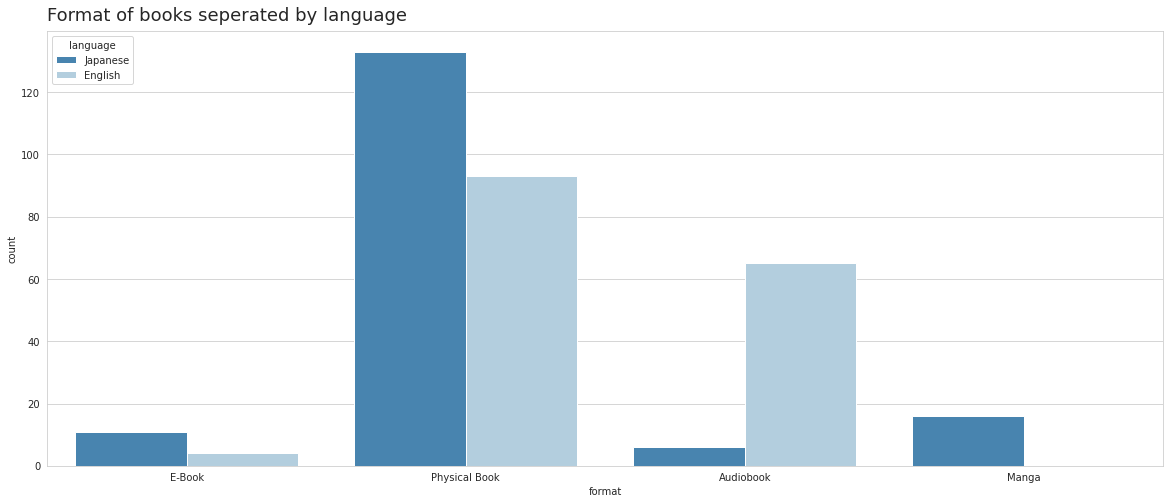

In [73]:
# distribution of the formats for books with a known completion date with respect to langauge
plt.figure(figsize = (20,8))
sns.countplot(x = "format", data = Completed, hue = "language", palette = "Blues_r")
plt.title("Format of books seperated by language", size = 18, loc = "left", y = 1.01)
plt.show()

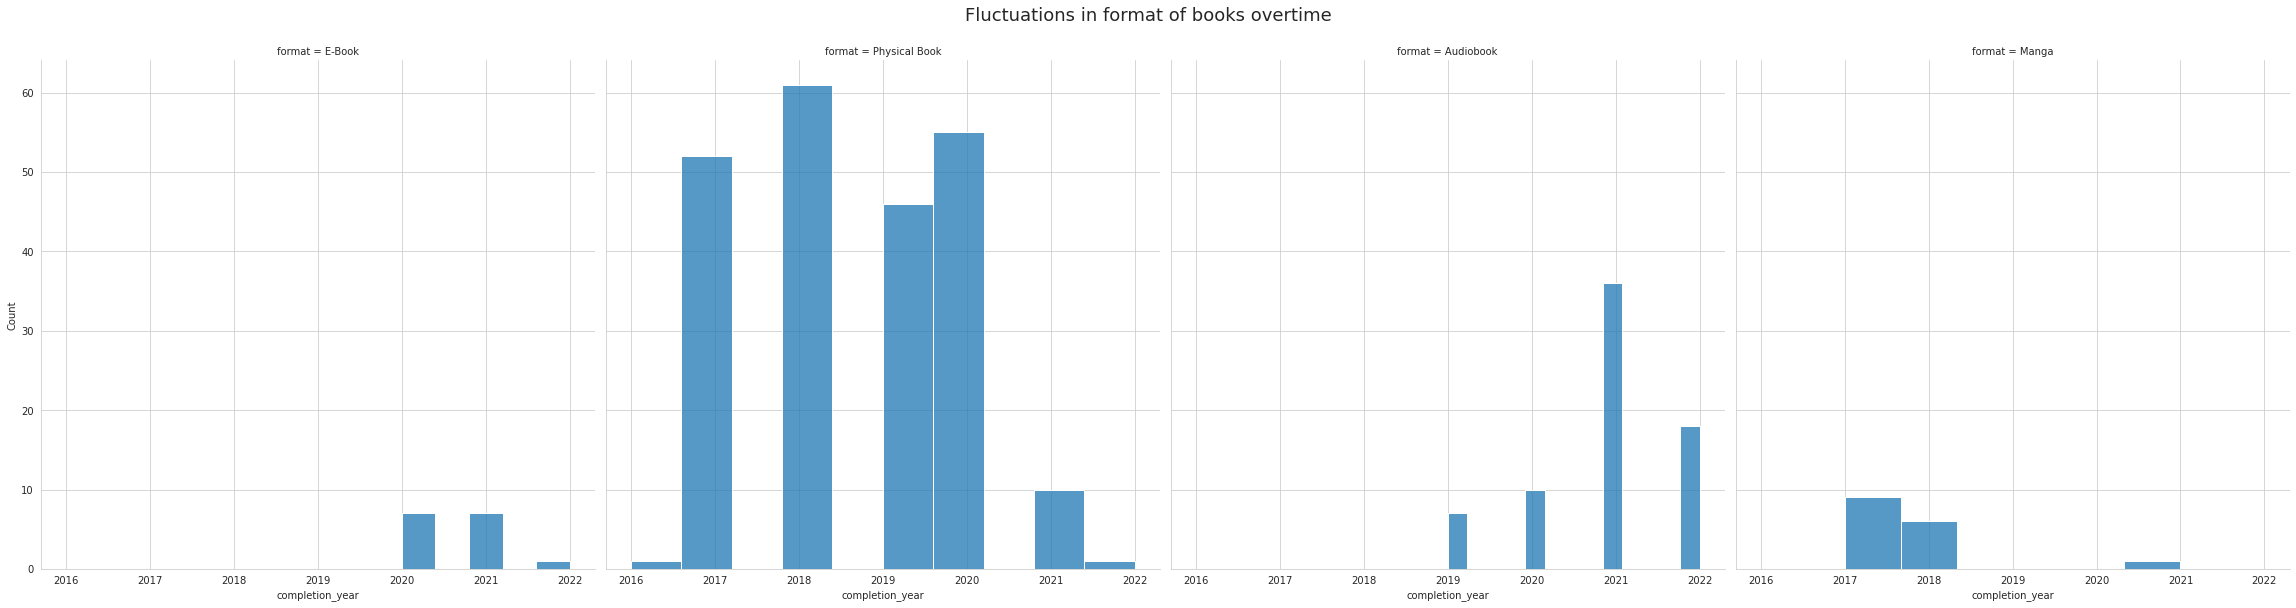

In [74]:
# changes to the format of books with a know completion date with respect to time
g = sns.FacetGrid(Completed, col='format', height=8, )
g.map(sns.histplot, "completion_year")
plt.suptitle("Fluctuations in format of books overtime", size = 18, y = 1.05)
plt.show()

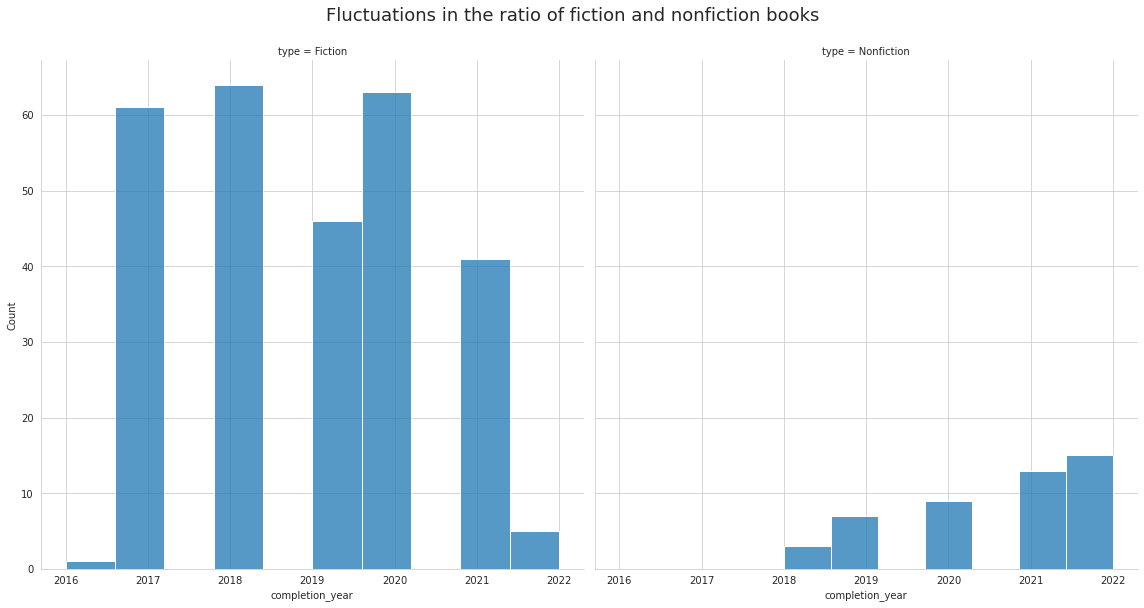

In [75]:
# changes to type for books with know completion date with respect to time
g = sns.FacetGrid(Completed, col='type', height=8,)
g.map(sns.histplot, "completion_year")
plt.suptitle("Fluctuations in the ratio of fiction and nonfiction books", size = 18, y = 1.05)
plt.show()

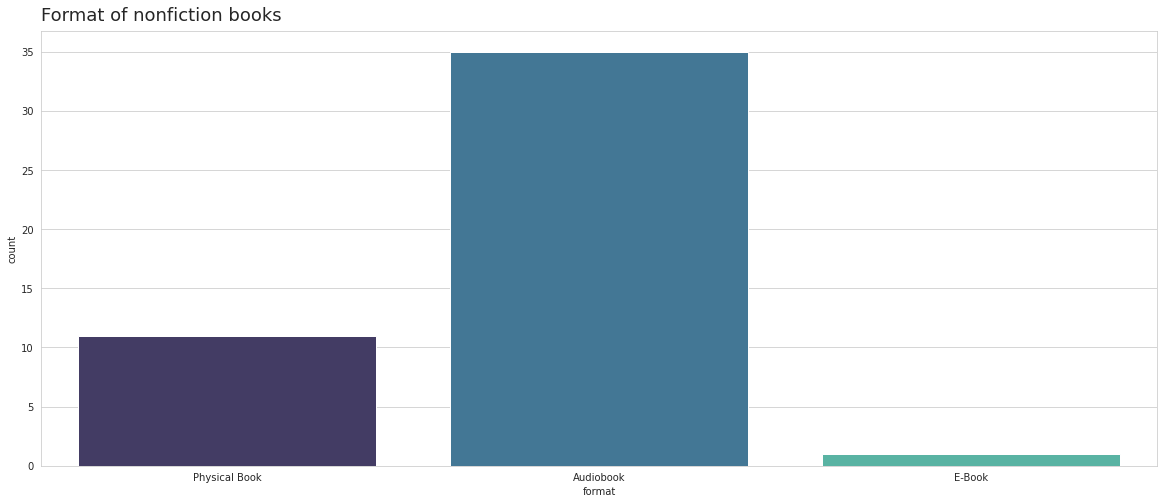

In [76]:
# consumption patter of nonfiction books where completion date is known

plt.figure(figsize = (20,8))
sns.countplot(x = "format", data = Completed[Completed["type"]=="Nonfiction"], palette = "mako")
plt.title("Format of nonfiction books",  size = 18, loc = "left", y = 1.01)
plt.show()

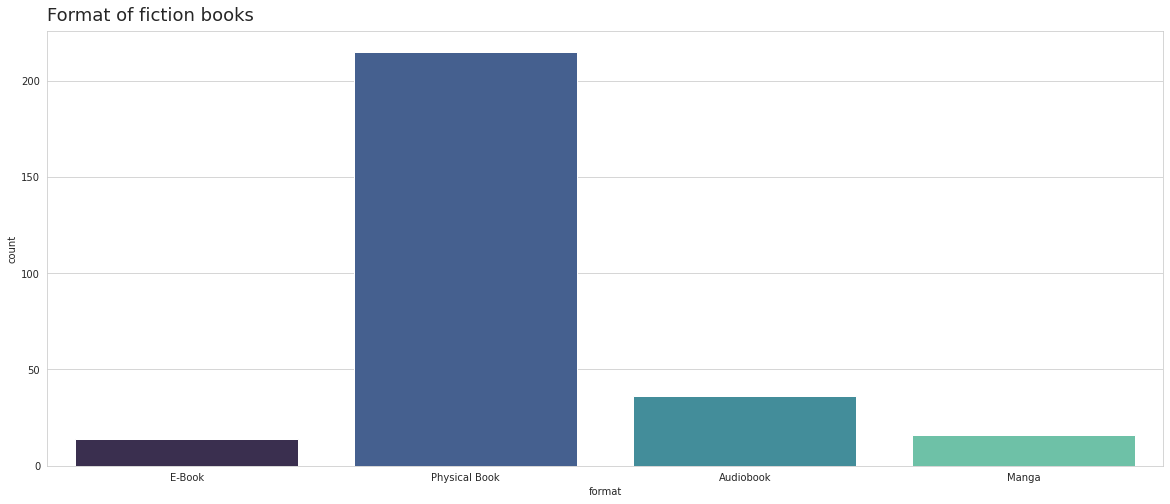

In [77]:

# consumption patter of fiction books where completion date is known

plt.figure(figsize = (20,8))
sns.countplot(x = "format", data = Completed[Completed["type"]=="Fiction"], palette = "mako")
plt.title("Format of fiction books",  size = 18, loc = "left", y = 1.01)
plt.show()

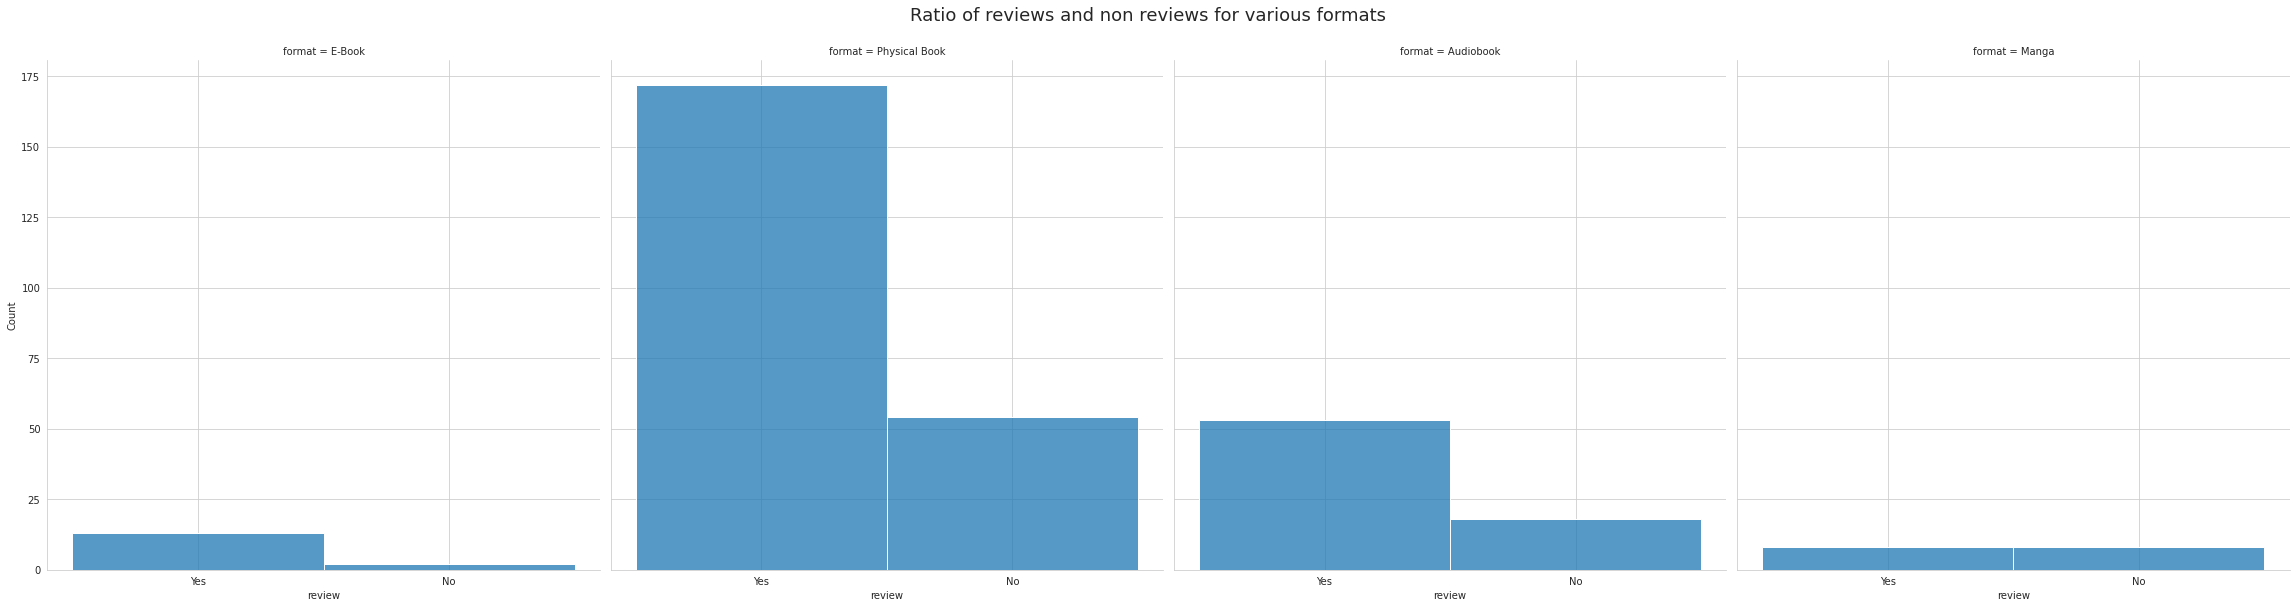

In [78]:
# distribution of reviews with respect to format for books with a known completion date
g = sns.FacetGrid(Completed, col='format', height=8, )
g.map(sns.histplot, "review")
plt.suptitle("Ratio of reviews and non reviews for various formats",  size = 18, y = 1.05)
plt.show()

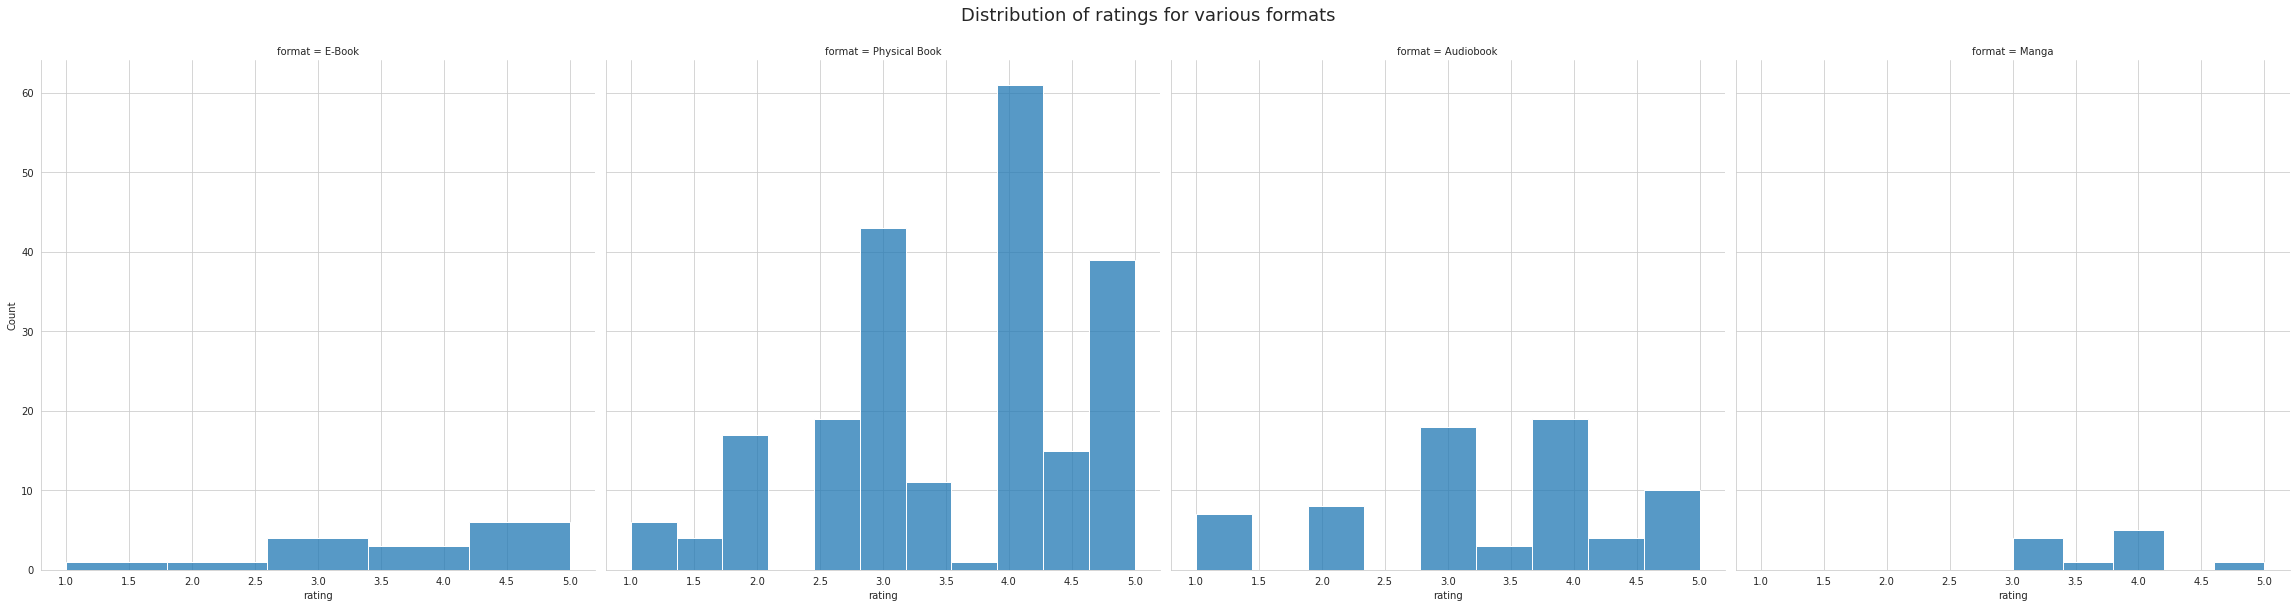

In [79]:
# distribution of ratings with respect to format for books with a known completion date
g = sns.FacetGrid(Completed, col='format', height=8,)
g.map(sns.histplot, "rating")
plt.suptitle("Distribution of ratings for various formats",  size = 18, y = 1.05)
plt.show()

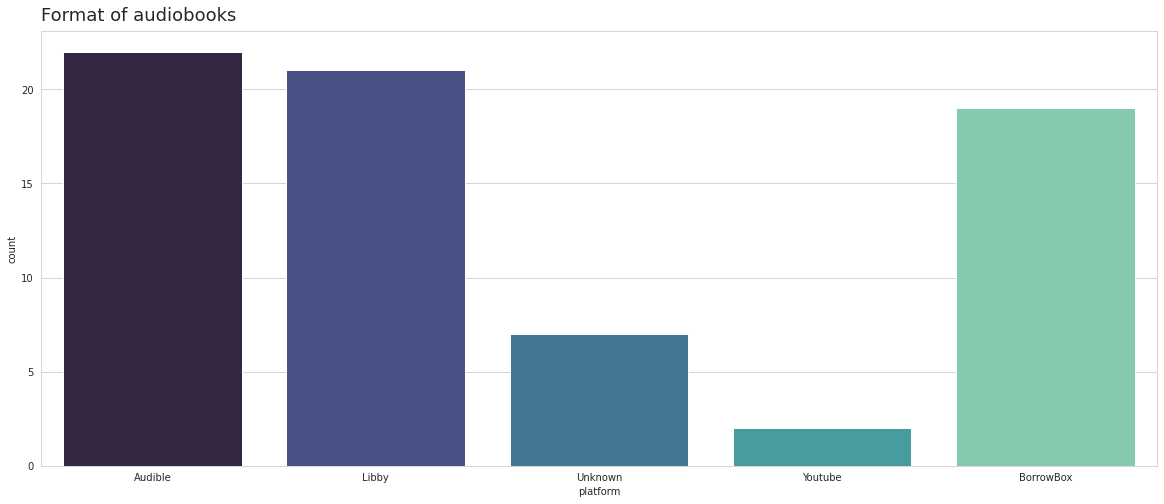

In [80]:
# consumption pattern of audibooks for books with a known completiond date

plt.figure(figsize = (20,8))
sns.countplot(x = "platform", data = Completed[Completed["format"]=="Audiobook"], palette = "mako")
plt.title("Format of audiobooks",  size = 18, loc = "left", y = 1.01)
plt.show()

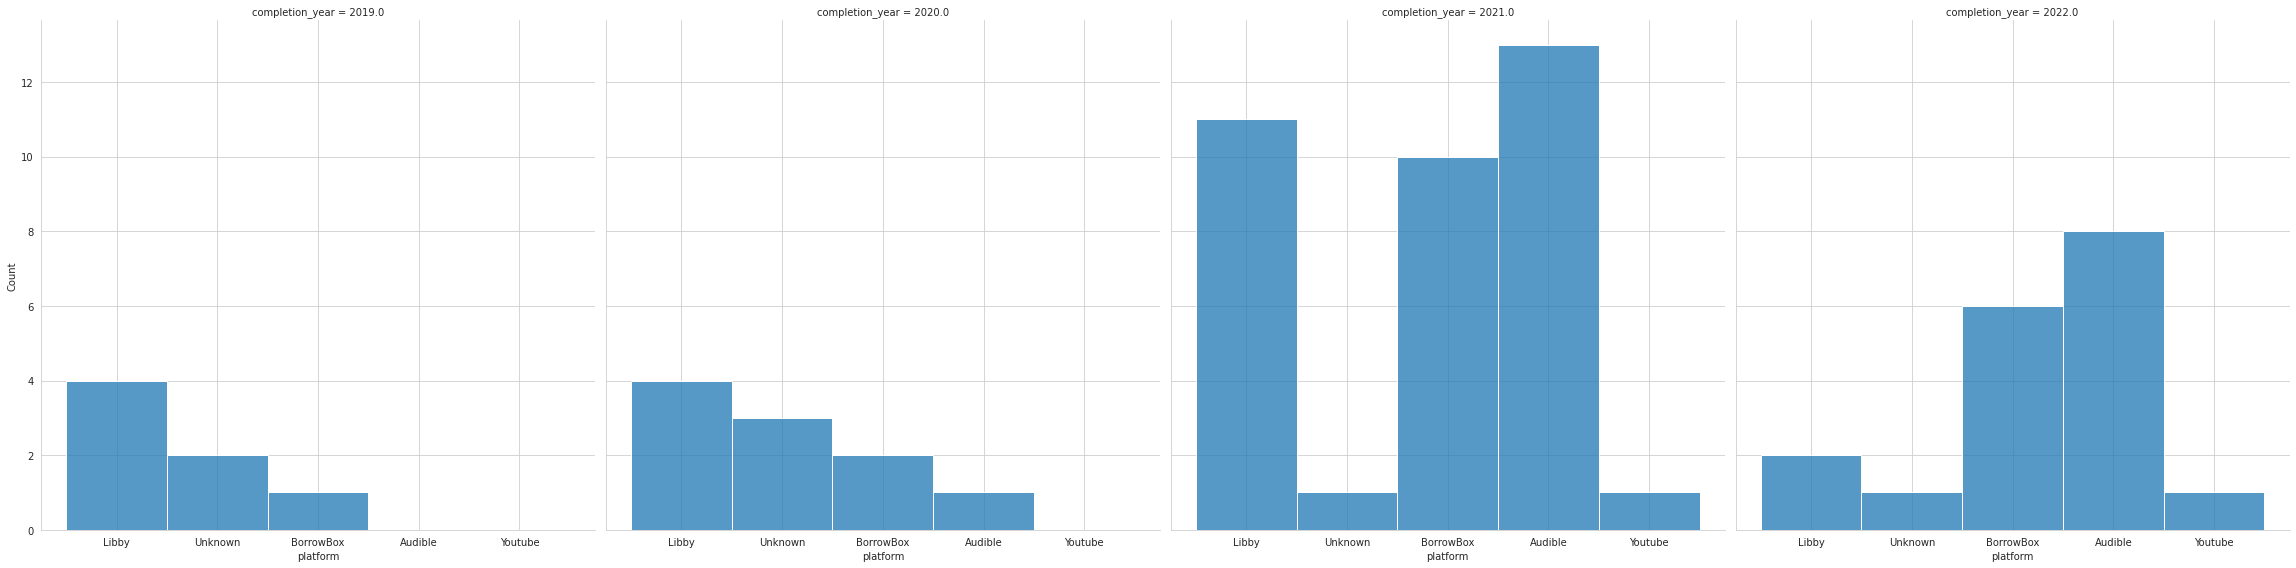

In [81]:
# fluctuations over time in the consumption patterns of audibooks for books with a known completiond date
g = sns.FacetGrid(Completed[Completed["format"]=="Audiobook"], col='completion_year', height=8)
g.map(sns.histplot, "platform")
plt.show()

In [82]:
print("There are",first_reads["publisher"].nunique(),"publishers and", first_reads["Imprint"].nunique(), "imprints for each unique book.")

There are 56 publishers and 114 imprints for each unique book.


In [83]:
# mos popular publishers
publisher = first_reads["publisher"].value_counts().rename_axis ("publisher").reset_index(name = "books/reads")
publisher[publisher["books/reads"]>1].head(10)

,publisher,books/reads
0,Penguin Random House,55
1,KADOKAWA,52
2,集英社,23
3,講談社,22
4,HarperCollins,17
5,Macmillan Publishers,17
6,文藝春秋,13
7,Orion,12
8,新潮社,9
9,Hachette Book,9


In [84]:
# most popular imprints 
Imprint = first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,20
1,講談社文庫,18
2,コバルト文庫,15
3,Penguin,13
4,文春文庫,13
5,Penguin Classics,13
6,メディアワークス文庫,11
7,Picador,9
8,角川ホラー文庫,8
9,Gollancz,7


In [85]:
Japanese_first_reads = first_reads[first_reads["language"]=="Japanese"]
Imprint = Japanese_first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
print("There are", Imprint["Imprint"].nunique(),"imprints in the books consumed in Japanese.")

There are 43 imprints in the books consumed in Japanese.


In [86]:
# most popular imprints for Japanese books
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,20
1,講談社文庫,18
2,コバルト文庫,15
3,文春文庫,13
4,メディアワークス文庫,11
5,角川ホラー文庫,8
6,一迅社,6
7,新潮文庫,6
8,アスキーメディアワークス,5
9,光文社文庫,5


In [87]:
English_first_reads = first_reads[first_reads["language"]=="English"]
Imprint = English_first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
print("There are", Imprint["Imprint"].nunique(),"imprints in the books consumed in English.")

There are 72 imprints in the books consumed in English.


In [88]:
# most popular imprints for English books
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,Penguin,13
1,Penguin Classics,12
2,Picador,9
3,Gollancz,7
4,Vintage Classics,6
5,HarperCollins,6
6,Wordsworth Editions,5
7,Orion Children's Books,5
8,Vintage,4
9,Black Swan,4


In [89]:
# distribution of genres for books with a known completion date
fig = px.histogram( Completed, x = "genre")

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-55, font = dict(size = 10, color = "grey"), align = "left")

In [90]:
# distribution of genres for Japanese books with a known completion date
fig = px.histogram( Completed[Completed["language"]=="Japanese"], x = "genre")

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-5, font = dict(size = 10, color = "grey"), align = "left")

In [91]:
# distribution of genres for English books with a known completion date
fig = px.histogram( Completed[Completed["language"]=="English"], x = "genre")

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-55, font = dict(size = 10, color = "grey"), align = "left")

In [92]:
English_books = Completed[(Completed["language"]=="English")&(Completed["completion_year"]>2016)]
English_popular_genres = English_books["genre"].value_counts().rename_axis ("Genre").reset_index(name = "books/reads")

Top_genres = English_popular_genres.head(10)

popular_genres = Completed[Completed["genre"].isin(Top_genres["Genre"])]

fig = px.histogram( popular_genres[popular_genres["completion_year"]==2017], x = "genre", )

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline = True, linewidth = 1, linecolor = "black")
fig.update_yaxes(showline = True, linewidth = 1, linecolor = "black")

fig.add_annotation(text = ("Source: https://github.com/Lostinworlds/EvaluatingReading/blob/main/reading%20log(manually%20collected).csv"), showarrow = False, x =0, y =-.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
                  xshift = -1, yshift =-5, font = dict(size = 10, color = "grey"), align = "left")